In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 定义函数
def true_function(x):
    return 2 * x**2 + 3 * x + 5

# 生成训练集和测试集
np.random.seed(42)
torch.manual_seed(42)

# 生成随机数据点
num_points = 100
X_train = np.random.uniform(-10, 10, num_points)
Y_train = true_function(X_train) + np.random.normal(0, 5, num_points)

X_test = np.linspace(-10, 10, 100)
Y_test = true_function(X_test)

# 转换为PyTorch张量
X_train_tensor = torch.FloatTensor(X_train.reshape(-1, 1))
Y_train_tensor = torch.FloatTensor(Y_train.reshape(-1, 1))

X_test_tensor = torch.FloatTensor(X_test.reshape(-1, 1))
Y_test_tensor = torch.FloatTensor(Y_test.reshape(-1, 1))

In [3]:
# 定义两层的ReLU网络
class ReLUNetwork(nn.Module):
    def __init__(self):
        super(ReLUNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [4]:
# 使用GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [5]:
# 初始化模型、损失函数和优化器
model = ReLUNetwork().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1) # 优化器起大作用

In [6]:
# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    X_train_tensor = X_train_tensor.to(device)
    Y_train_tensor = Y_train_tensor.to(device)
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor)
    # print(loss.item())
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 54.5966
Epoch [200/1000], Loss: 21.3250
Epoch [300/1000], Loss: 19.3556
Epoch [400/1000], Loss: 18.7358
Epoch [500/1000], Loss: 18.4025
Epoch [600/1000], Loss: 18.2467
Epoch [700/1000], Loss: 18.1532
Epoch [800/1000], Loss: 18.0031
Epoch [900/1000], Loss: 17.8884
Epoch [1000/1000], Loss: 17.7858


In [7]:
# 测试模型
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    predictions = model(X_test_tensor)
loss_test = criterion(predictions, Y_test_tensor.to(device))

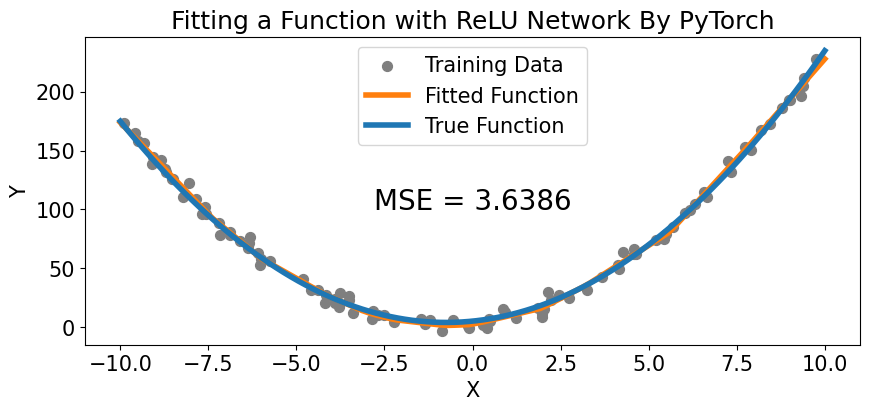

In [8]:
# 绘制结果
plt.figure(figsize=(10, 4))
plt.rcParams.update({'font.size': 15})
plt.scatter(X_train, Y_train, s = 50, c = '#7f7f7f', label='Training Data')
plt.plot(X_test, predictions.cpu().numpy(), c = '#ff7f0e', linewidth = 4, label='Fitted Function')
plt.plot(X_test, Y_test, c = '#1f77b4', linewidth = 4, label='True Function')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting a Function with ReLU Network By PyTorch')
plt.text(0, 100, f'MSE = {loss_test.cpu().item():.4f}', fontsize=20, ha='center')
plt.show()